# Anomaly Detection & Time Series | Assignment

1. **What is Anomaly Detection? Explain its types (point, contextual, and**
**collective anomalies) with examples.**

    Anomaly Detection is the process of finding unusual data points that differ from normal patterns. It has three types: Point anomalies, where a single data point is abnormal (e.g., a ₹1,00,000 transaction among ₹5,000 ones); Contextual anomalies, which depend on context (e.g., 25°C is normal in summer but abnormal in winter); and Collective anomalies, where a group of data points together show abnormal behavior (e.g., a sudden spike in network traffic indicating a cyberattack).


2. **Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of**
**their approach and suitable use cases**.

    Isolation Forest isolates anomalies by randomly splitting data — anomalies are easier to isolate. It works well for high-dimensional data and large datasets.

    DBSCAN groups dense regions and labels low-density points as outliers — best for spatial or cluster-based data.
    
    Local Outlier Factor (LOF) measures how isolated a point is compared to its neighbors — ideal for local density-based anomalies in datasets with varying densities.


3. **What are the key components of a Time Series? Explain each with one**
**example**.

    The key components of a Time Series are:

    Trend – the long-term movement or direction in data (e.g., sales increasing steadily over years).

    Seasonality – repeating patterns at regular intervals (e.g., ice cream sales peaking every summer).

    Cyclic – fluctuations over longer, irregular periods (e.g., economic recessions).

    Irregular/Noise – random, unpredictable variations (e.g., sudden drop in sales due to a one-day strike).

4. **Define Stationary in time series. How can you test and transform a**
**non-stationary series into a stationary one?**

    A stationary time series has constant mean, variance, and covariance over time — its statistical properties do not change. To test stationarity, the Augmented Dickey-Fuller (ADF) test or rolling mean plots are commonly used. To make a series stationary, techniques like differencing, log transformation, or detrending can be applied to remove trends or seasonality.


5. **Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in**
**terms of structure and application**.

    AR (AutoRegressive): Uses past values to predict future ones (e.g., sales today depend on previous days).

    MA (Moving Average): Uses past error terms for prediction (e.g., averages past residuals to smooth noise).

    ARIMA (AutoRegressive Integrated Moving Average): Combines AR and MA with differencing to handle non-stationarity.

    SARIMA (Seasonal ARIMA): Extends ARIMA to model seasonal patterns (e.g., monthly demand cycles).

    SARIMAX (Seasonal ARIMA with Exogenous variables): Adds external factors (like temperature or promotions) to improve forecasting accuracy.

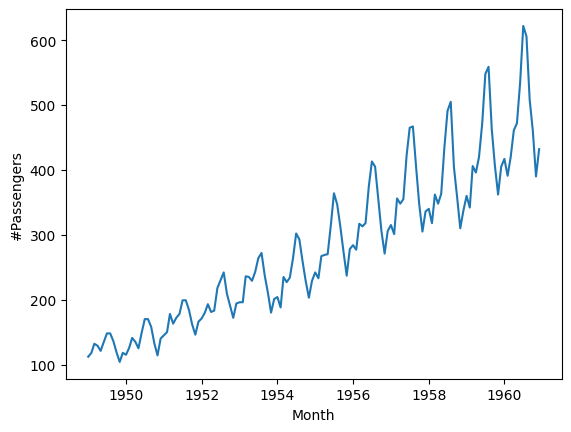

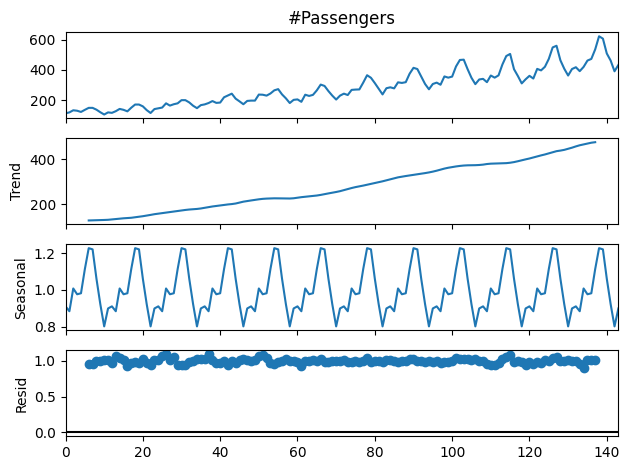

In [5]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
import pandas as pd
df = pd.read_csv("AirPassengers.csv")
df.head()

df['Month'] = pd.to_datetime(df['Month'])

import matplotlib.pyplot as plt
plt.plot(df['Month'], df['#Passengers'])
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.show()



from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)

decomposition.plot()
plt.tight_layout()
plt.show()

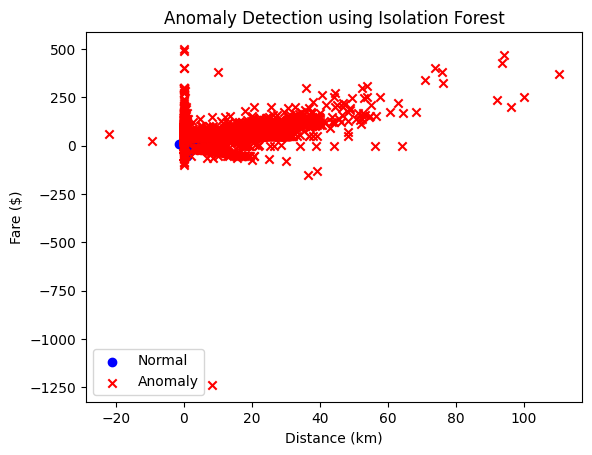

In [18]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
import pandas as pd
df = pd.read_csv("NYC_taxi_fare_data.csv")
df.head()

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.3)

from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
iso.fit(X_train[['trip_distance', 'fare_amount']])

X_test['anomaly'] = iso.predict(X_test[['trip_distance', 'fare_amount']])

normal = X_test[X_test['anomaly']==1]
anomaly = X_test[X_test['anomaly']==-1]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(normal['trip_distance'], normal['fare_amount'],c='blue', label='Normal')
plt.scatter(anomaly['trip_distance'], anomaly['fare_amount'], c='red', label='Anomaly', marker='x')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Distance (km)")
plt.ylabel("Fare ($)")
plt.legend()
plt.show()



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


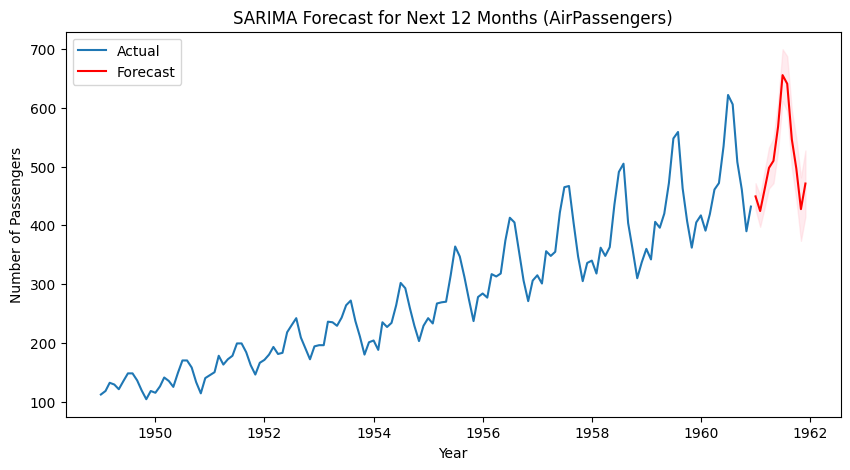

In [24]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

import pandas as pd
df = pd.read_csv("AirPassengers.csv")
df.head()
df['Month'] = pd.to_datetime(df['Month'])

df.set_index('Month', inplace=True)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['#Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'], label='Actual')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast for Next 12 Months (AirPassengers)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


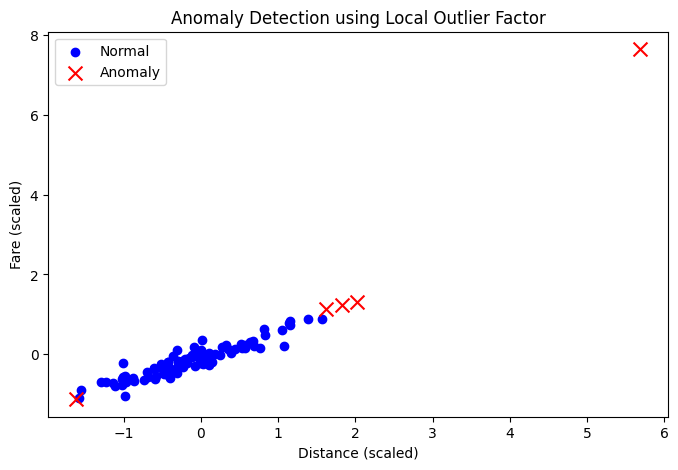

In [28]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)
n_samples = 300
distance = np.random.normal(5, 2, n_samples)
fare = distance * 2.5 + np.random.normal(0, 2, n_samples)

distance = np.append(distance, [20, 22, 25])
fare = np.append(fare, [100, 110, 130])


data = pd.DataFrame({'distance': distance, 'fare': fare})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_test)


normal = X_test[y_pred == 1]
anomaly = X_test[y_pred == -1]

plt.figure(figsize=(8,5))
plt.scatter(normal[:,0], normal[:,1], c='blue', label='Normal')
plt.scatter(anomaly[:,0], anomaly[:,1], c='red', label='Anomaly', marker='x', s=100)
plt.title("Anomaly Detection using Local Outlier Factor")
plt.xlabel("Distance (scaled)")
plt.ylabel("Fare (scaled)")
plt.legend()
plt.show()


**Question 10: You are working as a data scientist for a power grid monitoring** **company.Your goal is to forecast energy demand and also detect** **abnormal spikes or drops inreal-time consumption data collected every 15** **minutes. The dataset includes features like timestamp, region, weather** **conditions**, **and energy usage.Explain your real-time data science workflow**:

● **How would you detect anomalies in this streaming data (Isolation Forest / LOF /DBSCAN)?**

● **Which time series model would you use for short-term forecasting** (ARIMA /
SARIMA / SARIMAX)?

● **How would you validate and monitor the performance over time**?

● **How would this solution help business decisions or operations**?

Solution:

  Anomaly Detection: For the streaming 15-minute energy data, use Isolation Forest or Local Outlier Factor (LOF) to detect sudden spikes or drops. A sliding window approach allows continuous monitoring and flags unusual consumption patterns in real time.

  Time Series Forecasting: For short-term forecasting, use SARIMAX to capture trend, seasonality, and external factors like weather. This helps predict energy demand for the next few hours, enabling proactive load management.

Validation and Monitoring: Validate the model using rolling forecasts on historical data with metrics like MAE or RMSE. Monitor performance continuously, detect drift, and retrain periodically to adapt to changing consumption patterns.

Business Impact: This solution helps prevent grid overloads, improves energy allocation, supports operational decisions, and reduces costs by forecasting demand accurately and detecting anomalies early.